<a href="https://colab.research.google.com/github/oiegrant/coursework/blob/main/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INET 4061 Lab 3
# Grant Oie
# 2/5/2023

# __<font color=green>OVERVIEW</font><br>__


#### __<font color=yellow>Business Problem</font><br>__

In this Lab our 'business problem' is: using 2 fabricated datasets, we are attempting to understand the statistical difference (if any) that age and race has on voting.

#### __<font color=yellow>Brief Explanation of a One-Way ANOVA test</font><br>__

ANOVA (analysis fo variance) is a statistical inference test allowing you to compare statistics accross multiple groups. A one-way ANOVA test holds three primary assumptions: normal population distribution, distributions have same variance, and the data is independent. The most important results for intepretation coming out of one-way ANOVA test are the test statistic and p-value. The primary conclusive power comes from the p-value, where if the p-value is below your alpha value, you can reject the null hypothesis, otherwise you fail to reject the null hypothesis.
(https://online.stat.psu.edu/stat500/lesson/10/10.2/10.2.1#:~:text=Assumptions%20for%20One%2DWay%20ANOVA,The%20data%20are%20independent.)

#### __<font color=yellow>Definitions</font><br>__

F-test: is a statistical test often used for data with an F-distribution. It usually refers the comparison of variances accross datasets.
<br><br>
F-stat: the primary stat used to conduct F-tests. equal to the division of variances of two datasets.
<br><br>
Bonferroni Correction: An adjustment made ot p-values when several statistical tests are being performed on a single dataset. Performed by dividing the p value by the number of comparisons being made. This correction reduces the chances of obtaining false-positive results (https://www.aaos.org/aaosnow/2012/apr/research/research7/)
<br><br>
Tukey's test: This is a multi-comparison method used to find if means are significantly different between groups


#### __<font color=yellow>Objectives</font><br>__
Our objective for this lab is to understand if the mean age of different races varies with each dataset.  


# __<font color=green>DATA</font><br>__

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


In [ ]:
np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})

#Count of each race in dataset
print(voter_frame.race.value_counts())
print(voter_frame.describe())

groups = voter_frame.groupby("race").groups

# Extract individual group ages
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

__Dataset 1 Description__ <br>
This dataset contains 1000 individuals of varying races (proportion for each race set to [0.05, 0.15 ,0.25, 0.05, 0.5] for races ["asian","black","hispanic","other","white"], respectively). The mean age accross the data set is 47.7 years, with a standard deviation of 5.3 years.

__Null Hypothesis:__ There is no difference in mean age across the race groups


In [ ]:
np.random.seed(12)

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Use a different distribution for white ages
white_ages = stats.poisson.rvs(loc=18, 
                              mu=32,
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

#returns a combined array where white ages correspond to voter_race=white
voter_age = np.where(voter_race=="white", white_ages, voter_age)

# Group age data by race
voter_frame_2 = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame_2.groupby("race").groups   

print(voter_frame_2.race.value_counts())
print(voter_frame_2.describe())


# Extract individual groups
asian2 = voter_age[groups["asian"]]
black2 = voter_age[groups["black"]]
hispanic2 = voter_age[groups["hispanic"]]
other2 = voter_age[groups["other"]]
white2 = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian2, black2, hispanic2, other2, white2)

white       515
hispanic    244
black       147
other        50
asian        44
Name: race, dtype: int64
              age
count  1000.00000
mean     49.14100
std       5.72205
min      29.00000
25%      45.00000
50%      49.00000
75%      53.00000
max      72.00000


F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)

__Dataset 2 Description__ <br>
This dataset contains 1000 individuals of varying races (proportion for each race set to [0.05, 0.15 ,0.25, 0.05, 0.5] for races ["asian","black","hispanic","other","white"], respectively). This dataset differs from Dataset 1 in that the samples with race=white are given ages based on a different distribution. The mean age accross the data set is 49.1 years, with a standard deviation of 5.7 years.

Null Hypothesis: There is no difference in mean age across the race groups


# __<font color=green>Exploratory Data Analysis</font><br>__

I ran two sets of exploratory data analysis on these datasets, with a goal of visualizing the difference within each dataset, and the differences accross the two datasets.<br><br>

#### __<font color=yellow>Analysis One: Age Histogram by Race</font><br>__
The first analysis I performed was creating an age histogram for each race within its dataset, graphing them all on the same age axis so any shifts would become more apparent. I also added a mean line for each race so that I could get a feel for where the middle of the data sits within each group.<br><br>

In Dataset 1, all of the distributions have a semi-normal shape, with the Asian histogram showing a bi-modal shape, although it is hard to tell with these sample sizes. The mean lines don't show any significant flucuation, with all groups falling between ~47.5 and 49.<br><br>

In Dataset 2, each race again seems to have a somewhat normal shape, including the Asian samples. The major difference between this set of histograms and those of Dataset 1 is that the White mean is slightly above 50, whereas the other means sit in a range slighly below (as expected given data construction.)<br><br>
#### __<font color=yellow>Analysis Two: Boxplots</font><br>__
In this analysis I wanted to try and observe some more detail behind the skewing of Dataset 2 based on the increased white age. I first ran a similar analysis as in Analysis One except with boxplots. In the boxplots of dataset you can see tha  the white has a slighly taller box than the other races as compared within Dataset 2. Dataset 1 looks more closely spread accross all races. 

#### __<font color=yellow>Summary</font><br>__

Given that this each dataset was randomly generated with only a sample size of 1000, the normal-ish data distributions was expected, and the higher white mean in Dataset 2 was engineered to be present, and so was also expected. 


In [ ]:
%matplotlib inline

# voter_frame.hist(bins=15,figsize=(20,15))
print(voter_frame.head())
type(voter_frame)

       race  age
0     black   51
1     white   49
2  hispanic   51
3     white   48
4     asian   56


pandas.core.frame.DataFrame

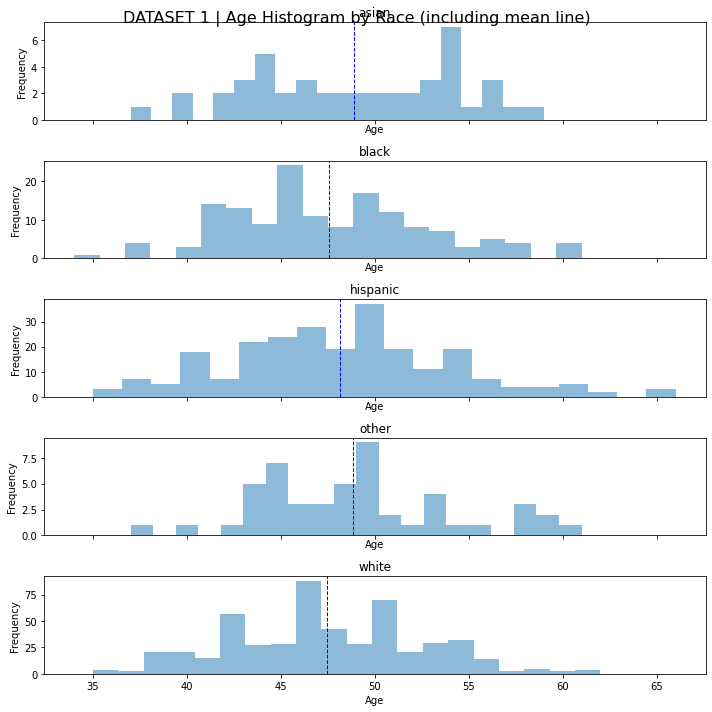

In [ ]:

race_grouped_1 = voter_frame.groupby("race")
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(nrows=len(race_grouped_1),figsize=(10,10),sharex=True)
fig.suptitle("DATASET 1 | Age Histogram by Race (including mean line)",fontsize=16)

for i, (name, group) in enumerate(race_grouped_1):
    ax[i].hist(group["age"], bins=20, alpha=0.5)
    ax[i].axvline(group["age"].mean(), color='b', linestyle='dashed', linewidth=1)
    ax[i].set_title(name)
    ax[i].set_ylabel("Frequency")
    ax[i].set_xlabel("Age")


# Formatting tips used from
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

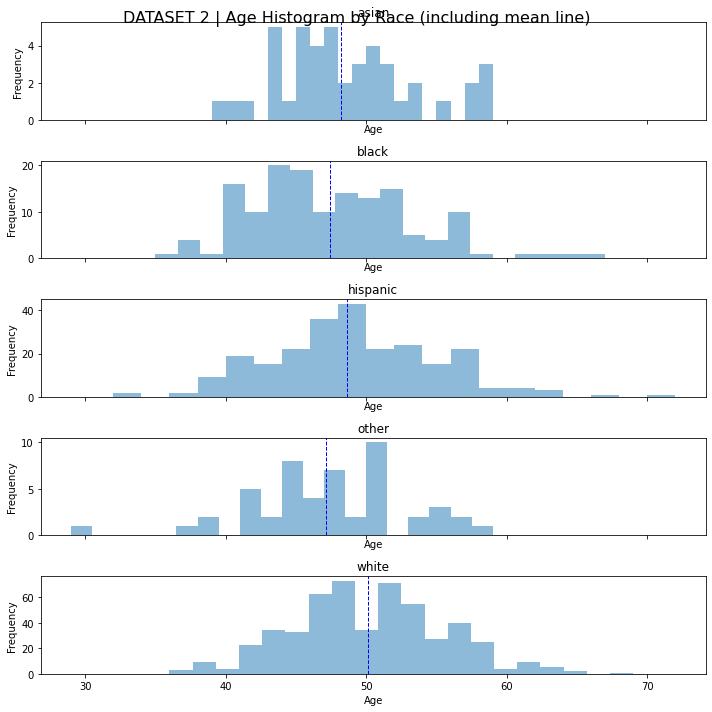

In [ ]:
race_grouped_2 = voter_frame_2.groupby("race")
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(nrows=len(race_grouped_2),figsize=(10,10),sharex=True)
fig.suptitle("DATASET 2 | Age Histogram by Race (including mean line)",fontsize=16)

for i, (name, group) in enumerate(race_grouped_2):
    ax[i].hist(group["age"], bins=20, alpha=0.5)
    ax[i].axvline(group["age"].mean(), color='b', linestyle='dashed', linewidth=1)
    ax[i].set_title(name)
    ax[i].set_ylabel("Frequency")
    ax[i].set_xlabel("Age")


# Formatting tips used from
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

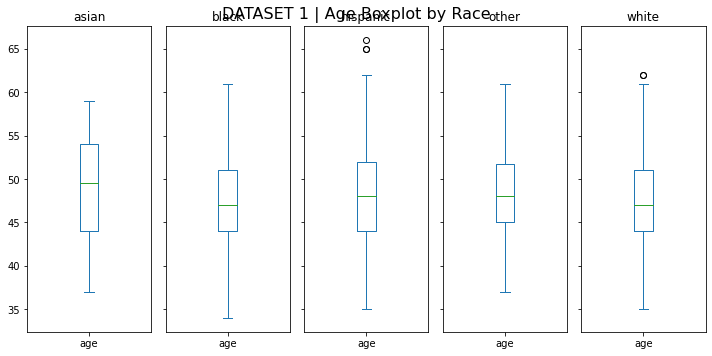

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=len(race_grouped_1),figsize=(10,5),sharey=True)
fig.suptitle("DATASET 1 | Age Boxplot by Race",fontsize=16)

i=0
for name, group in race_grouped_1:
    group['age'].plot.box(ax=ax[i],grid=False)
    ax[i].set_title(name)
    i+=1

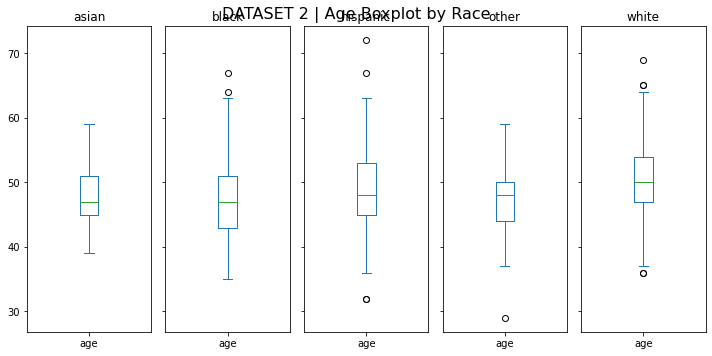

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=len(race_grouped_2),figsize=(10,5),sharey=True)
fig.suptitle("DATASET 2 | Age Boxplot by Race",fontsize=16)

i=0
for name, group in race_grouped_2:
    group['age'].plot.box(ax=ax[i],grid=False)
    ax[i].set_title(name)
    i+=1

# __<font color=green>MODELLING</font><br>__


### __<font color=yellow>Dataset 1 Modelling</font><br>__


In [ ]:

stats.f_oneway(asian, black, hispanic, other, white)

Dataset 1 | F-Test


F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

In [ ]:
# One-way ANOVA
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

voter_frame_anova = voter_frame
# Ordinary Least Squares (OLS) model
voter_frame_anova.columns = [ 'race', 'age']
model = ols('age ~ race', data=voter_frame).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


         race  age
0       black   51
1       white   49
2    hispanic   51
3       white   48
4       asian   56
..        ...  ...
995     white   47
996     asian   40
997     white   50
998     white   51
999  hispanic   43

[1000 rows x 2 columns]


,sum_sq,df,F,PR(>F)
race,199.369,4.0,1.774469,0.131732
Residual,27948.102,995.0,NaN,NaN


One-Way ANOVA and F-test Results:

P of 0.1317 is not low enough to reject null hypothesis, so we can't say the mean age between groups is different

In [ ]:
#T Test
from scipy import stats
import statsmodels.stats.multicomp as mc

comp1 = mc.MultiComparison(voter_frame['age'], voter_frame['race'])
tbl, a1, a2 = comp1.allpairtest(stats.ttest_ind)
#a1[0] prints the stat and pval values from tbl
#a1[1] prints the reject status of the compairsons
#a1[2] prints the p-value corrections based on bonferroni 

print(f'tbal is ...{tbl}')

#https://stackoverflow.com/questions/60265435/t-test-in-python-for-multiple-group-comparisons

tbal is ...Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.005
 group1   group2    stat   pval  pval_corr reject
-------------------------------------------------
   asian    black  1.4723 0.1426       1.0  False
   asian hispanic  0.7953 0.4271       1.0  False
   asian    other  0.0239 0.9809       1.0  False
   asian    white  1.7848 0.0748    0.7484  False
   black hispanic  -0.978 0.3287       1.0  False
   black    other -1.5379 0.1257       1.0  False
   black    white  0.1754 0.8608       1.0  False
hispanic    other -0.8181 0.4139       1.0  False
hispanic    white  1.5959 0.1109       1.0  False
   other    white  1.8669 0.0624    0.6244  False
-------------------------------------------------


T-Test w/ Bonferroni Results:

There were no rejections of the null hypothesis  accross all of the races, so we can't say the mean age between groups is different

In [ ]:
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp_res = pairwise_tukeyhsd(endog=voter_frame['age'], groups=voter_frame['race'], alpha=0.05)
print(m_comp_res)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
   asian    black  -1.3353 0.5735 -3.8242 1.1535  False
   asian hispanic  -0.7593    0.9 -3.1315 1.6129  False
   asian    other  -0.0264    0.9 -3.0202 2.9674  False
   asian    white  -1.4184 0.4336 -3.6932 0.8564  False
   black hispanic    0.576 0.8145 -0.9362 2.0882  False
   black    other    1.309 0.5494 -1.0622 3.6801  False
   black    white  -0.0831    0.9 -1.4374 1.2713  False
hispanic    other    0.733 0.8996 -1.5154 2.9813  False
hispanic    white  -0.6591 0.4974 -1.7847 0.4665  False
   other    white   -1.392 0.3912 -3.5374 0.7533  False
-------------------------------------------------------


Tukey Test Results:

There were no rejections of the null hypothesis  accross all of the races, so we can't say the mean age between groups is different

### __<font color=yellow>Dataset 2 Modelling</font><br>__


In [ ]:
stats.f_oneway(asian2, black2, hispanic2, other2, white2)

Dataset 2 | F-Test


F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)

In [ ]:
# One-way ANOVA
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

voter_frame_anova = voter_frame_2

# Ordinary Least Squares (OLS) model
voter_frame_anova.columns = [ 'race', 'age']
model = ols('age ~ race', data=voter_frame_2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
race,1284.123213,4.0,10.1647,4.561324e-08
Residual,31424.995787,995.0,NaN,NaN


One-Way ANOVA and F-test Results:

P of 4.56e-08 is significantly low so we can reject null hypothesis, meaning that the variances are different accross groups

In [ ]:
#T Test
from scipy import stats
import statsmodels.stats.multicomp as mc

comp1 = mc.MultiComparison(voter_frame_2['age'], voter_frame_2['race'])
tbl, a1, a2 = comp1.allpairtest(stats.ttest_ind)
#a1[0] prints the stat and pval values from tbl
#a1[1] prints the reject status of the compairsons
#a1[2] prints the p-value corrections based on bonferroni 

print(f'tbal is ...{tbl}')

#https://stackoverflow.com/questions/60265435/t-test-in-python-for-multiple-group-comparisons

tbal is ...Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.005
 group1   group2    stat   pval  pval_corr reject
-------------------------------------------------
   asian    black  0.8386 0.4027       1.0  False
   asian hispanic -0.4259 0.6705       1.0  False
   asian    other  0.9795 0.3299       1.0  False
   asian    white -2.3181 0.0208     0.208  False
   black hispanic -1.9528 0.0516    0.5156  False
   black    other  0.2803 0.7796       1.0  False
   black    white -5.3793    0.0       0.0   True
hispanic    other  1.5854  0.114       1.0  False
hispanic    white  -3.516 0.0005    0.0046   True
   other    white -3.7638 0.0002    0.0018   True
-------------------------------------------------


T-Test w/ Bonferroni Results:

The null hypothesis was rejected accross the follow group pairings: (black, white), (hispanic, white), (other, white).

We can conclude the the mean age for these group pairings is not equal.


In [ ]:
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp_res = pairwise_tukeyhsd(endog=voter_frame_2['age'], groups=voter_frame_2['race'], alpha=0.05)
print(m_comp_res)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
   asian    black  -0.8032    0.9 -3.4423  1.836  False
   asian hispanic   0.4143    0.9 -2.1011 2.9297  False
   asian    other  -1.0645 0.8852 -4.2391   2.11  False
   asian    white   1.9547  0.175 -0.4575 4.3668  False
   black hispanic   1.2175 0.2318  -0.386  2.821  False
   black    other  -0.2614    0.9 -2.7757  2.253  False
   black    white   2.7579  0.001  1.3217  4.194   True
hispanic    other  -1.4789 0.4391  -3.863 0.9053  False
hispanic    white   1.5404  0.004  0.3468  2.734   True
   other    white   3.0192 0.0028  0.7443 5.2941   True
-------------------------------------------------------


Tukey Test Results:

The null hypothesis was rejected accross the follow group pairings: (black, white), (hispanic, white), (other, white).

We can conclude the the mean age for these group pairings is not equal.


# __<font color=green>CONCLUSION</font><br>__


Based on the results demonstrated in the Model section above, we can draw the following conclusions.<br> 
For Dataset 1 we can conclude that there was no statistically significant differences in average age accross any of the race groups.
<br>
For Dataset 2, we can conclude that there were statistically significant differences in average age accross some age groups, specifically between the white group and the black, hispanic, and other groups.
<br>

We did set out to solve our initial goal of determining any age differences between the two voter sets. Concluding that there was no significant age difference in Dataset 1, while there was a difference in Dataset 2.
<br>

Additional data would bolster this analysis, given that only a sample size of 1000 was utilized for each voting group (dataset).